In [1]:
use "../3_output/regression_analysis_ind_with_ent_sent_june2020.dta", clear

## make labels and create demeaned vars

In [2]:
egen mean_ent_others = mean(ent_others)
gen ent_others_demean=ent_others-mean_ent_others



(2,773 missing values generated)


In [3]:
egen mean_ent_self = mean(ent_self)
gen ent_self_demean=ent_self-mean_ent_self



(2,773 missing values generated)


In [4]:
egen mean_avg_v2=mean(avg_v2)
gen avg_v2_demean=avg_v2-mean_avg_v2

In [5]:
egen mean_avgmean_others=mean(avgmean_others)
gen avgmean_others_demean=avgmean_others-mean_avgmean_others



(1,479 missing values generated)


In [6]:
gen ent_others_sq=ent_others*ent_others
gen ent_self_demean_sq=ent_self_demean*ent_self_demean


(2,773 missing values generated)

(2,773 missing values generated)


In [7]:

label variable ent_self_demean "Rating_Entropy_Self"
label variable ent_self "Rating_Entropy_Self"
label variable ent_others_demean "Rating_Entropy_Others"
label variable ent_others "Rating_Entropy_Others"
label variable avg_v2_demean "Average_Rating_Self"
label variable avg_v2 "Average_Rating_Self"
label variable avgmean_others_demean "Average_Rating_Others"
label variable avgmean_others "Average_Rating_Others"
label variable reviews_ct "Review_Count"
label variable log_experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"
label variable log_zip_rev "Market_LogRevenue"
label variable ent_others_sq  "Rating_Entropy_Others^2"
label variable ent_self_demean_sq "Rating_Entropy_Self^2"
label variable log_quotes "Installer Activity Level"

In [8]:
su avg_sent_score


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576


In [9]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576
avg_sent_s~t |      8,113    .5971259    .2507234          0    .886075
avg_sent_s~s |      8,113    .5662764    .2792114     -.5994      .9576


In [10]:
gen avg_sent_score_demean=avg_sent_score-.4119695
label variable avg_sent_score_demean "Average_Sentiment_Self"
gen avg_sent_score_others_demean=avg_sent_score_others- .5615071
label variable avg_sent_score_others_demean "Average_Sentiment_Others"
gen text_d_self_p50_demean=text_d_self_p50-0.0635868
label variable text_d_self_p50_demean  "Text-based_Entropy_Self"
gen text_d_others_p50_demean=text_d_others_p50-0.1245589
label variable text_d_others_p50_demean "Text-based_Entropy_Others"






(4,113 missing values generated)


(1,535 missing values generated)



## Subsetting observations used for the model 

In [11]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [12]:
codebook installer_id


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [108,23027]                  units:  1
         unique values:  385                      missing .:  0/8,113

                  mean:   17971.7
              std. de

In [13]:
su reviews_ct,d


                        Review_Count
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               8,113
25%            0              0       Sum of Wgt.       8,113

50%            1                      Mean           3.397387
                        Largest       Std. Dev.       5.80235
75%            4             48
90%           10             48       Variance       33.66726
95%           14             51       Skewness       3.136374
99%           29             52       Kurtosis       15.33371


In [14]:
codebook installer_id if reviews_ct>3


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [363,22992]                  units:  1
         unique values:  186                      missing .:  0/2,287

                  mean:   18779.4
              std. de

In [15]:
su ent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     ent_mkt |      5,340    .2376226    .1857222          0    1.05492
  ent_others |      5,340    .2247373    .1915538          0   1.070593
    ent_self |      5,340    .0981426    .2199734          0   1.209574
ent_others~n |      5,340    2.79e-09    .1915538  -.2247373   .8458561
ent_self_d~n |      5,340   -1.38e-09    .2199734  -.0981426   1.111431
-------------+---------------------------------------------------------
ent_others~q |      5,340    .0871928    .1348904          0    1.14617
ent_self_d~q |      5,340    .0483792    .1159573   .0001067    1.23528


In [16]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


## Simply subset to high-reviews_ct obs

In [17]:
su reviews_ct,d


                        Review_Count
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               8,113
25%            0              0       Sum of Wgt.       8,113

50%            1                      Mean           3.397387
                        Largest       Std. Dev.       5.80235
75%            4             48
90%           10             48       Variance       33.66726
95%           14             51       Skewness       3.136374
99%           29             52       Kurtosis       15.33371


In [18]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 

drop if ent_others_demean==.


 
qui:areg f.log_quotes  $iv_0_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if reviews_ct>=5  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo

esttab est1 est2 est3   ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)
  






(2,773 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


--------------------------------------------------------------------
                              (1)             (2)             (3)   
                     F.Installe~l    F.Installe~l    F.Installe~l   
--------------------------------------------------------------------
Rating_Entropy_Self                                         1.418   
                                                          (0.059)   

Rating_Entropy_Sel~t                                       -2.723***
                                                          (0.001)   

Rating_Entropy_Oth~s                        0.916*          0.884*  
                                          (0.013)         (0.016)   

Rating_Entropy_Oth~E                       -1.691          -2.046*  
                                          (0.077)         (0.037)   

Average_Rating_Self        -0.467          -0.396          -0.513   
               

## Examine the monthly and quarterly additions

In [19]:
gen diff_reviews_ct_monthly=reviews_ct-l.reviews_ct

(364 missing values generated)


In [20]:
gen diff_reviews_ct_quarterly=reviews_ct-l4.reviews_ct

(1,335 missing values generated)


In [21]:
su diff_reviews_ct*,d


                   diff_reviews_ct_monthly
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               4,976
25%            0              0       Sum of Wgt.       4,976

50%            0                      Mean           .4240354
                        Largest       Std. Dev.      1.362918
75%            0             21
90%            1             22       Variance       1.857545
95%            2             25       Skewness       8.061613
99%            6             25       Kurtosis       104.0344

                  diff_reviews_ct_quarterly
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               4,005
25%            0              0       Sum of Wgt.       4,005

50%

In [22]:
codebook installer_id


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [363,23027]                  units:  1
         unique values:  364                      missing .:  0/5,340

                  mean:   18516.3
              std. de

In [23]:
codebook installer_id if diff_reviews_ct_monthly>2&diff_reviews_ct_monthly!=.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [551,23027]                  units:  1
         unique values:  139                      missing .:  0/220

                  mean:   19573.7
              std. dev:

(bin=36, start=0, width=.86111111)


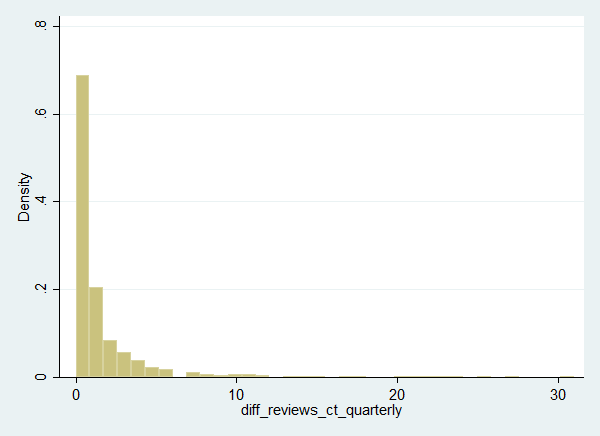

In [24]:
histogram diff_reviews_ct_quarterly

In [25]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 

drop if ent_others_demean==.



qui:areg f.log_quotes $iv_11_demean if reviews_ct>=5  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo   

qui:areg f.log_quotes $iv_11_demean if mod(year_month_count,2)==1   , absorb( installer_id) vce(robust) 
eststo
qui:areg f.log_quotes  $iv_12_demean if mod(year_month_count,2)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_0_demean if mod(year_month_count,4)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if mod(year_month_count,4)==1   , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if mod(year_month_count,4)==1 , absorb( installer_id) vce(robust)
eststo


esttab *,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)
// esttab  est5 est6  est8 est9  est11 est12 using rob_subsettingreviewsct.csv  ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)






(0 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


(est5 stored)


(est6 stored)


(est7 stored)


------------------------------------------------------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)             (5)             (6)             (7)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
------------------------------------------------------------------------------------------------------------------------------------
Rating_Entropy_Self                         1.418                           0.956                                           1.529   
                                          (0.059)                         (0.085)                                         (0.094)   

Rating_Entropy_Sel~t                       -2.723***     

# Data Explore: How many active  firms per month

In [26]:
su log_quotes,d


                  Installer Activity Level
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               5,340
25%     1.098612              0       Sum of Wgt.       5,340

50%     2.397895                      Mean           2.364969
                        Largest       Std. Dev.      1.673884
75%     3.610918       6.985642
90%     4.584968       7.023759       Variance       2.801887
95%     5.141664       7.041412       Skewness       .2136994
99%     6.361302       7.257003       Kurtosis        2.23555


## 358 installers were 'ever' active on the platform 

In [27]:
codebook installer_id if log_quotes>1


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [363,23027]                  units:  1
         unique values:  358                      missing .:  0/4,020

                  mean:   18807.5
              std. de

# How many were active per cluster per month? 

In [28]:
gen active=(log_quotes>1)

In [29]:
tab active


     active |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,320       24.72       24.72
          1 |      4,020       75.28      100.00
------------+-----------------------------------
      Total |      5,340      100.00


In [30]:
codebook market


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
market                                                                                                                                                                                                                                              (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (byte)

                 range:  [-1,36]                      units:  1
         unique values:  36                       missing .:  0/5,340

                  mean:   17.7041
              std. d

In [31]:
su year_month*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
year_month~t |      5,340    49.57921    10.24324          7         64


In [32]:
bysort market year_month* market (installer_id):gen cluster_active=sum(active)

In [33]:
su cluster_active if ent_others>0, d


                       cluster_active
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            1              0
10%            1              0       Obs               3,834
25%            2              0       Sum of Wgt.       3,834

50%            4                      Mean            5.99374
                        Largest       Std. Dev.      5.132419
75%            8             28
90%           13             29       Variance       26.34173
95%           17             29       Skewness       1.477669
99%           24             29       Kurtosis       5.223154


(bin=35, start=0, width=.82857143)


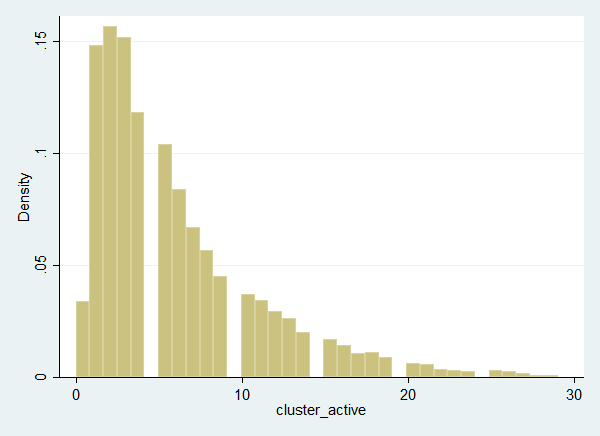

In [34]:
histogram cluster_active if ent_others>0 



(440 observations deleted)



                        (sum) active
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            1              0       Obs               1,063
25%            1              0       Sum of Wgt.       1,063

50%            2                      Mean           3.507056
                        Largest       Std. Dev.      4.500648
75%            4             27
90%            8             29       Variance       20.25584
95%           13             29       Skewness       2.682761
99%           22             29       Kurtosis       11.49189

(bin=30, start=0, width=.96666667)


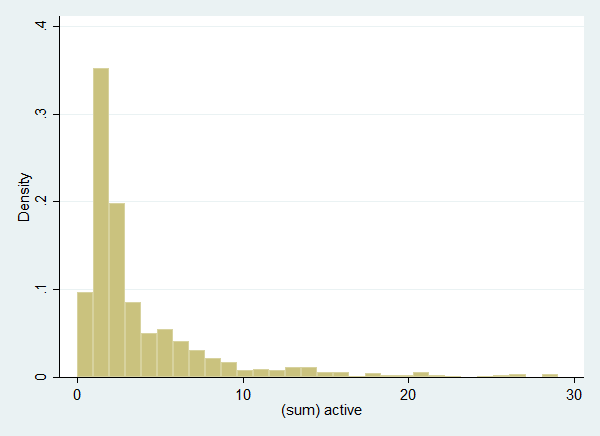

In [35]:
preserve
keep if market!=-1
collapse (sum)active ,by(market year_month*)
su active, d
histogram active
restore

## Expore ways to do an IV regression

In [39]:
ssc install xtivreg2

checking xtivreg2 consistency and verifying not already installed...
installing into c:\ado\plus\...
installation complete.


In [42]:
xtset installer_id year_month_count

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 7 to 64
                delta:  1 unit


In [45]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean_iv "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "
eststo clear 
//gen ent_others_demean_sq=ent_others_demean*ent_others_demean 
//gen ent_self_demean_sq=ent_self_demean*ent_self_demean  
drop if ent_others_demean==.

qui:areg f.log_quotes  $iv_12_demean , absorb( installer_id) vce(robust) 
eststo 
qui: xtivreg f.log_quotes  $iv_12_demean_iv (ent_others_demean=l.ent_others_demean) ent_others_demean_sq, fe 
eststo

esttab, p 







(0 observations deleted)


(est1 stored)


(est2 stored)


--------------------------------------------
                      (1)             (2)   
             F.log_quotes    F.log_quotes   
--------------------------------------------
avg_v2_dem~n       -0.303**        -0.289***
                  (0.001)         (0.000)   

missing_avg        -1.226**        -2.119***
                  (0.009)         (0.000)   

reviews_ct         0.0453***       0.0513***
                  (0.000)         (0.000)   

avgmean_ot~n     -0.00702         -0.0324   
                  (0.948)         (0.797)   

ent_others~n        0.629**         0.607*  
                  (0.001)         (0.026)   

ent_self_d~n        0.936*                  
                  (0.011)                   

c.ent_othe~d       -2.479***                
                  (0.000)                   

c.ent_self~a       -1.301*                  
                  (0.034)                   

log_experi~e        0.221**